In [227]:
import os
import geopandas as gpd
import fiona
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from sklearn.cluster import KMeans
import geopy.distance
pd.options.display.max_columns=60
pd.options.display.max_rows=70
%matplotlib inline

#qeds.themes.mpl_style();

In [92]:
file1 = '/Users/santien/reto_1/doc_subterraneas.kml'
file2 = '/Users/santien/reto_1/doc_superficiales.kml'
file3 = '/Users/santien/reto_1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
file4 = '/Users/santien/reto_1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
file5 = '/Users/santien/reto_1/Escalas_subterranea.csv'
file6 = '/Users/santien/reto_1/Escalas_superficial.csv'

In [93]:
os.listdir('reto_1')

['Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'doc_subterraneas.kml',
 'doc_superficiales.kml',
 'Escalas_subterranea.csv',
 'Escalas_superficial.csv']

In [107]:
if os.path.exists(file1):
    gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
    df_subterraneas = gpd.read_file(file1, driver='KML')  

In [108]:
if os.path.exists(file2):
    gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
    df_superficiales = gpd.read_file(file2, driver='KML')

In [109]:
df_subterraneas.head()  

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


In [110]:
df_superficiales.head()

,Name,Description,geometry
0,,,POINT Z (-102.33911 22.24730 0.00000)
1,,,POINT Z (-109.84290 22.90473 0.00000)
2,,,POINT Z (-109.86442 22.89880 0.00000)
3,,,POINT Z (-109.88604 22.89609 0.00000)
4,,,POINT Z (-109.89657 22.87694 0.00000)


In [393]:
if os.path.exists(file3):
    df_calidad_agua_sub=pd.read_csv(file3,encoding='latin1')

In [394]:
if os.path.exists(file4):
    df_calidad_agua_sup=pd.read_csv(file4,encoding='latin1')


In [395]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [114]:
df_calidad_agua_sup.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [389]:
if os.path.exists(file5):
    df_escala_sub=pd.read_csv(file5,encoding='latin1')
df_escala_sub.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


In [390]:
if os.path.exists(file6):
    df_escala_sup=pd.read_csv(file6,encoding='latin1')
df_escala_sup.head()

,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
0,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
1,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
2,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
3,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
4,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION


In [378]:
#mapa mundial
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


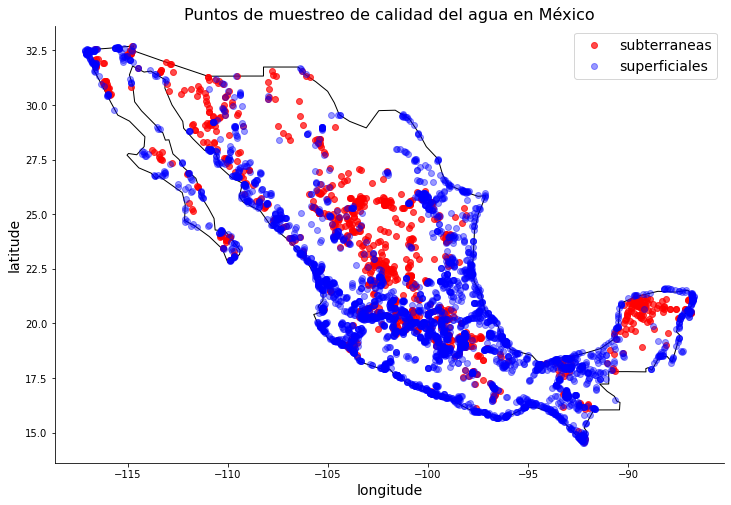

In [126]:
fig, gax = plt.subplots(figsize=(12,12))
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# Locaciones geograficas de interes
df_subterraneas.plot(ax=gax, color='red', alpha = 0.7,legend = True)
df_superficiales.plot(ax=gax, color='blue', alpha = 0.4,legend = True)
#centers_df.plot(ax=gax,color='green')

gax.set_xlabel('longitude',fontsize=14)
gax.set_ylabel('latitude',fontsize=14)
gax.set_title('Puntos de muestreo de calidad del agua en México',fontsize=16)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.legend(['subterraneas','superficiales'],fontsize=14)
plt.show()

# Exploración de los datos

In [396]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [132]:
df_calidad_agua_sub.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [397]:
df_calidad_agua_sub.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1068,1068,DLDUR684,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1068,1066,POZO VILLA UNION,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1068,13,CUENCAS CENTRALES DEL NORTE,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1068,32,DURANGO,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1068,452,LA PAZ,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1068,273,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1068,8,POZO,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1068.0,NaN,NaN,NaN,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.86412
LATITUD,1068.0,NaN,NaN,NaN,23.163618,3.88767,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


In [398]:
df_calidad_agua_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [399]:
# eliminar columna con puros nulls
df_calidad_agua_sub.drop('SDT_mg/L',axis=1,inplace=True)

# Muchas columnas tipo objeto, pero con datos númericos

In [411]:
[(item,df_calidad_agua_sub[item].dtype, df_calidad_agua_sub[item].isna().sum(),list(df_calidad_agua_sub[item].head(2))) \
 for item in df_calidad_agua_sub.columns]

[('CLAVE', dtype('O'), 0, ['DLAGU6', 'DLAGU6516']),
 ('SITIO', dtype('O'), 0, ['POZO SAN GIL', 'POZO R013 CAÑADA HONDA']),
 ('ORGANISMO_DE_CUENCA',
  dtype('O'),
  0,
  ['LERMA SANTIAGO PACIFICO', 'LERMA SANTIAGO PACIFICO']),
 ('ESTADO', dtype('O'), 0, ['AGUASCALIENTES', 'AGUASCALIENTES']),
 ('MUNICIPIO', dtype('O'), 0, ['ASIENTOS', 'AGUASCALIENTES']),
 ('ACUIFERO', dtype('O'), 0, ['VALLE DE CHICALOTE', 'VALLE DE CHICALOTE']),
 ('SUBTIPO', dtype('O'), 0, ['POZO', 'POZO']),
 ('LONGITUD', dtype('float64'), 0, [-102.0221, -102.20075]),
 ('LATITUD', dtype('float64'), 0, [22.20887, 21.99958]),
 ('PERIODO', dtype('int64'), 0, [2020, 2020]),
 ('ALC_mg/L', dtype('float64'), 4, [229.99, 231.99]),
 ('CALIDAD_ALC', dtype('O'), 4, ['Alta', 'Alta']),
 ('CONDUCT_mS/cm', dtype('float64'), 6, [940.0, 608.0]),
 ('CALIDAD_CONDUC',
  dtype('O'),
  6,
  ['Permisible para riego', 'Buena para riego']),
 ('SDT_M_mg/L', dtype('O'), 2, ['603.6', '445.4']),
 ('CALIDAD_SDT_ra',
  dtype('O'),
  2,
  ['Cultivos se

In [313]:
df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].head(3)

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L
0,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891
1,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025
2,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025


In [316]:
def convert_to_numeric(item):
    if type(item)==str:
        item=item.strip('<')
    return float(item)    

In [315]:
col_a_numeric=[item for item in df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].columns if "CALIDAD" not in item]

In [363]:
for col in col_a_numeric:
    df_calidad_agua_sub[col]=df_calidad_agua_sub[col].apply(convert_to_numeric)

# Identificar cantidad de niveles de columnas de calidad, para identificar niveles de mapeo ordinal

In [412]:
[(item,df_calidad_agua_sub[item].value_counts(),len(df_calidad_agua_sub[item].value_counts())) for item in df_calidad_agua_sub.columns if "CALIDAD" in item]

[('CALIDAD_ALC',
  Alta                    794
  Media                   187
  Indeseable como FAAP     59
  Baja                     24
  Name: CALIDAD_ALC, dtype: int64,
  4),
 ('CALIDAD_CONDUC',
  Permisible para riego    460
  Buena para riego         434
  Dudosa para riego         72
  Indeseable para riego     51
  Excelente para riego      45
  Name: CALIDAD_CONDUC, dtype: int64,
  5),
 ('CALIDAD_SDT_ra',
  Excelente para riego            491
  Cultivos sensibles              343
  Cultivos con manejo especial    161
  Cultivos tolerantes              64
  Indeseable para riego             7
  Name: CALIDAD_SDT_ra, dtype: int64,
  5),
 ('CALIDAD_SDT_salin',
  Potable - Dulce         834
  Ligeramente salobres    161
  Salobres                 68
  Salinas                   3
  Name: CALIDAD_SDT_salin, dtype: int64,
  4),
 ('CALIDAD_FLUO',
  Baja                434
  Potable - Optima    226
  Media               216
  Alta                192
  Name: CALIDAD_FLUO, dtype: int64,
 

In [407]:
#revisar faltantes
df_calidad_agua_sub.loc[df_calidad_agua_sub['ALC_mg/L'].isna()]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
406,DLNAY1855,POZO PANTANAL,LERMA SANTIAGO PACIFICO,NAYARIT,XALISCO,VALLE DE SANTA MARIA DEL ORO,POZO,-104.852820,21.42659,2020,NaN,NaN,302.0,Buena para riego,335.2,Excelente para riego,Potable - Dulce,<0.2,Baja,77.1888,Potable - Moderadamente suave,<1.1,Potable - Excelente,11.004114,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0422,Potable - Excelente,0.0922,Potable - Excelente,Rojo,"NO3,",ND,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
407,DLNAY1895,"MANANTIAL ""EL TESORERO""",PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,-105.080640,21.84760,2020,NaN,NaN,50.4,Excelente para riego,<25,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Suave,31,Buena calidad,0.124414,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0152,Potable - Excelente,0.2206,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
722,OCGCE3326,HOTEL JARAGUA S. A. DE C.V. (POZO 1),GOLFO CENTRO,VERACRUZ DE IGNACIO DE LA LLAVE,BOCA DEL RIO,COSTERA DE VERACRUZ,POZO,-96.105010,19.15072,2020,NaN,NaN,627.0,Buena para riego,498,Excelente para riego,Potable - Dulce,<0.2,Baja,246,Potable - Dura,<1.1,Potable - Excelente,5.681,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente,0.01227,Potable - Excelente,0.00058,Potable - Excelente,<0.005,Potable - Excelente,0.02474,Potable - Excelente,0.14133,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
861,OCNOR4205,CAMPO J. F. KENNEDY,NOROESTE,SONORA,PUERTO PEÑASCO,SONOYTA-PUERTO PEÑASCO,POZO,-113.313056,31.59940,2020,NaN,NaN,1281.0,Permisible para riego,1210,Cultivos con manejo especial,Ligeramente salobres,4.5144,Alta,118.2771,Potable - Moderadamente suave,<1.1,Potable - Excelente,5.555324,Potable - Buena calidad,0.0108,Apta como FAAP,<0.003,Potable - Excelente,0.0117,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,",ND,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [220]:
df_calidad_agua_sub['PB_TOT_mg/L'].value_counts()

<0.005     1038
0.0219        1
0.00556       1
0.00703       1
0.00734       1
0.0133        1
0.049         1
0.00619       1
0.00813       1
0.00557       1
0.0399        1
0.005         1
0.0116        1
0.00859       1
0.00737       1
0.01075       1
0.01117       1
0.00818       1
0.00644       1
0.0809        1
0.00596       1
0.00777       1
0.0053        1
0.046         1
0.01225       1
0.0152        1
0.00744       1
0.00709       1
0.00769       1
0.0135        1
0.0086        1
Name: PB_TOT_mg/L, dtype: int64

In [225]:
# entender valores de plomo que cambian calificación
df_calidad_agua_sub.loc[df_calidad_agua_sub['PB_TOT_mg/L'] != '<0.005','PB_TOT_mg/L':'CALIDAD_PB']

,PB_TOT_mg/L,CALIDAD_PB
14,0.0399,No apta como FAAP
159,0.049,No apta como FAAP
282,0.0135,No apta como FAAP
340,0.0809,No apta como FAAP
346,0.0219,No apta como FAAP
347,0.0152,No apta como FAAP
411,0.01117,No apta como FAAP
412,0.00813,Potable - Excelente
413,0.00818,Potable - Excelente
414,0.00737,Potable - Excelente


In [239]:
np.random.random_sample(10)*.0015

array([1.26056576e-03, 2.85967876e-05, 6.68536131e-04, 1.05833043e-03,
       1.44226240e-04, 1.32283729e-03, 8.65647400e-04, 7.59082415e-04,
       6.93929927e-04, 1.32156207e-04])

In [362]:
def convert_to_numeric_1(item,seed):
    #np.random.seed(seed)
    if type(item)==str:
        item=item.strip('<')
        np.random.seed(seed)
        item = np.random.random_sample()*float(item)
        #np.random.seed(seed)
        seed+=1
        #np.random.seed(seed)
        
    return float(item)

In [364]:
df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].head(3)

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L
0,331.263831,Cultivos sensibles,Potable - Dulce,0.535971,Potable - Optima,117.299008,Potable - Dura,0.603695,Potable - Excelente,2.296596,Potable - Excelente,0.008836,Apta como FAAP,0.001646,Potable - Excelente,0.002744,Potable - Excelente,0.000274,Potable - Excelente,0.002744,Potable - Excelente,0.000823,Potable - Excelente,0.048899
1,244.441535,Excelente para riego,Potable - Dulce,0.510287,Potable - Optima,101.558707,Potable - Dura,0.603695,Potable - Excelente,3.155738,Potable - Buena calidad,0.007354,Apta como FAAP,0.001646,Potable - Excelente,0.002744,Potable - Excelente,0.000274,Potable - Excelente,0.002744,Potable - Excelente,0.000823,Potable - Excelente,0.013720
2,187.694218,Excelente para riego,Potable - Dulce,0.990334,Alta,66.252217,Potable - Dura,0.603695,Potable - Excelente,0.795671,Potable - Excelente,0.020306,No apta como FAAP,0.001646,Potable - Excelente,0.002744,Potable - Excelente,0.000274,Potable - Excelente,0.002744,Potable - Excelente,0.000823,Potable - Excelente,0.013720


In [370]:
df_calidad_agua_sub['COLI_FEC_NMP/100_mL'].value_counts()

0.603695       737
5.488135        37
21.952540       28
10.976270       19
17.013219       13
              ... 
96.042363        1
3989.874174      1
145.435579       1
909.932790       1
4478.867006      1
Name: COLI_FEC_NMP/100_mL, Length: 125, dtype: int64

In [306]:
np.random.random_sample(1)

array([0.43248222])

In [287]:
df_calidad_agua_sub['SDT_M_mg/L']=df_calidad_agua_sub['SDT_M_mg/L'].apply(convert_to_numeric)

In [288]:
df_calidad_agua_sub['SDT_M_mg/L'][0]

603.6

In [173]:
df_calidad_agua_sub.loc[:,(df_calidad_agua_sub.isna().sum() >0)]

,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,DUR_mg/L,CALIDAD_DUR,N_NO3_mg/L,CALIDAD_N_NO3,CONTAMINANTES
0,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,213.732,Potable - Dura,4.184656,Potable - Excelente,NaN
1,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,185.0514,Potable - Dura,5.75011,Potable - Buena calidad,NaN
2,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,120.719,Potable - Dura,1.449803,Potable - Excelente,"FLUO,AS,"
3,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,199.879,Potable - Dura,1.258597,Potable - Excelente,NaN
4,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,476.9872,Potable - Dura,15.672251,No apta como FAAP,"NO3,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,752.096,Muy dura e indeseable usos industrial y domestico,14.615488,No apta como FAAP,"CONDUC,DT,NO3,"
1064,256.000,Alta,529.0,Buena para riego,NaN,297,Excelente para riego,Potable - Dulce,273,Potable - Dura,77.392,No apta como FAAP,"NO3,"
1065,330.690,Alta,2600.0,Dudosa para riego,NaN,1873,Cultivos con manejo especial,Ligeramente salobres,660.2126,Muy dura e indeseable usos industrial y domestico,36.477104,No apta como FAAP,"CONDUC,DT,NO3,"
1066,193.140,Alta,873.0,Permisible para riego,NaN,690.6667,Cultivos sensibles,Potable - Dulce,406.368,Potable - Dura,<0.02,Potable - Excelente,NaN


In [136]:
len(df_calidad_agua_sub)

1068

In [141]:
# esta variable se puede eliminar
df_calidad_agua_sub['CLAVE'].value_counts().sum()

1068

CALIDAD_ALC
Alta                    AxesSubplot(0.125,0.125;0.775x0.755)
Baja                    AxesSubplot(0.125,0.125;0.775x0.755)
Indeseable como FAAP    AxesSubplot(0.125,0.125;0.775x0.755)
Media                   AxesSubplot(0.125,0.125;0.775x0.755)
Name: ALC_mg/L, dtype: object

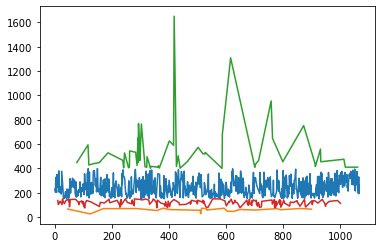

In [169]:
df_calidad_agua_sub.groupby('CALIDAD_ALC')['ALC_mg/L'].plot()

In [152]:
df_calidad_agua_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='